# World Happiness Analysis 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from CSV file
df = pd.read_csv('world_happiness.csv')

In [2]:
df.head()

,Unnamed: 0,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
0,1,Finland,2.0,5.0,4.0,47.0,42400,81.8,155
1,2,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154
2,3,Norway,3.0,3.0,8.0,11.0,66300,82.6,153
3,4,Iceland,1.0,7.0,45.0,3.0,47900,83.0,152
4,5,Netherlands,15.0,19.0,12.0,7.0,50500,81.8,151


In [3]:
df.columns

Index(['Unnamed: 0', 'country', 'social_support', 'freedom', 'corruption',
       'generosity', 'gdp_per_cap', 'life_exp', 'happiness_score'],
      dtype='object')

In [4]:
df.shape

(143, 9)

In [5]:
df.tail()

,Unnamed: 0,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
138,139,Rwanda,144.0,21.0,2.0,90.0,2110,69.1,4
139,140,Tanzania,131.0,78.0,34.0,49.0,2980,67.7,3
140,141,Afghanistan,151.0,155.0,136.0,137.0,1760,64.1,2
141,142,Central African Republic,155.0,133.0,122.0,113.0,794,52.9,1
142,143,South Sudan,148.0,154.0,61.0,85.0,1860,59.7,0


In [6]:
df.describe()

,Unnamed: 0,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
count,143.00000,142.000000,142.000000,135.000000,142.00000,143.000000,143.000000,143.000000
mean,72.00000,77.352113,77.000000,73.244444,78.78169,20124.286713,73.796503,77.643357
std,41.42463,45.743379,45.569058,42.237507,44.87921,20570.547556,7.092194,46.377418
min,1.00000,1.000000,1.000000,1.000000,1.00000,631.000000,52.900000,0.000000
25%,36.50000,37.250000,37.500000,37.500000,41.25000,4110.000000,69.100000,36.500000
50%,72.00000,76.000000,75.500000,74.000000,80.50000,13000.000000,74.900000,79.000000
75%,107.50000,116.750000,116.750000,109.500000,116.75000,29750.000000,79.650000,118.000000
max,143.00000,155.000000,155.000000,148.000000,155.00000,113000.000000,85.100000,155.000000


In [7]:
# 1. Which country has the highest and lowest happiness score?
max_happiness_country = df.loc[df['happiness_score'].idxmax(), 'country']
min_happiness_country = df.loc[df['happiness_score'].idxmin(), 'country']

print("Country with the highest happiness score:", max_happiness_country)
print("Country with the lowest happiness score:", min_happiness_country)


Country with the highest happiness score: Finland
Country with the lowest happiness score: South Sudan


In [8]:
# 2. Is there any relationship between social support and happiness score?
correlation_social_support = df['social_support'].corr(df['happiness_score'])
print("Correlation between social support and happiness score:", correlation_social_support)


Correlation between social support and happiness score: -0.8247024265741844


In [9]:
# 3. How does the GDP per capita vary across different countries?
average_gdp_per_capita = df['gdp_per_cap'].mean()
print("Average GDP per capita:", average_gdp_per_capita)

country_highest_gdp = df.loc[df['gdp_per_cap'].idxmax(), 'country']
country_lowest_gdp = df.loc[df['gdp_per_cap'].idxmin(), 'country']

print("Country with the highest GDP per capita:", country_highest_gdp)
print("Country with the lowest GDP per capita:", country_lowest_gdp)

Average GDP per capita: 20124.286713286714
Country with the highest GDP per capita: Qatar
Country with the lowest GDP per capita: Somalia


In [10]:
# 4. Which factors correlate the most with happiness score?
correlation_matrix = df.corr()
happiness_correlation = correlation_matrix['happiness_score'].drop('happiness_score')
most_correlated_factor = happiness_correlation.idxmax()

print("Factor most correlated with happiness score:", most_correlated_factor)


Factor most correlated with happiness score: life_exp


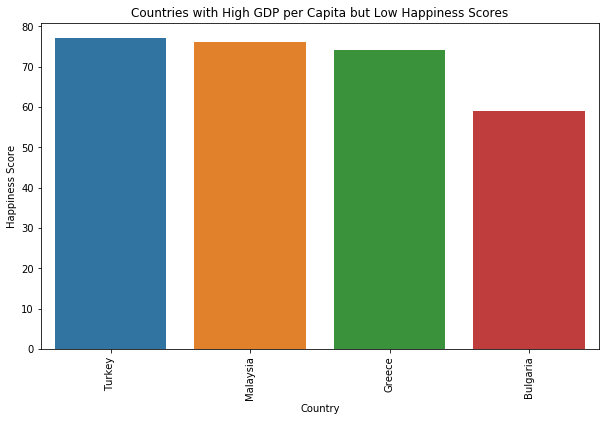

In [11]:
# 5. Are there any countries with high GDP per capita but relatively low happiness scores?
high_gdp_low_happiness = df[(df['gdp_per_cap'] > average_gdp_per_capita) & (df['happiness_score'] < df['happiness_score'].mean())]

plt.figure(figsize=(10, 6))
sns.barplot(data=high_gdp_low_happiness, x='country', y='happiness_score')
plt.title('Countries with High GDP per Capita but Low Happiness Scores')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=90)
plt.show()

Correlation between life expectancy and happiness score: 0.7802249053272062


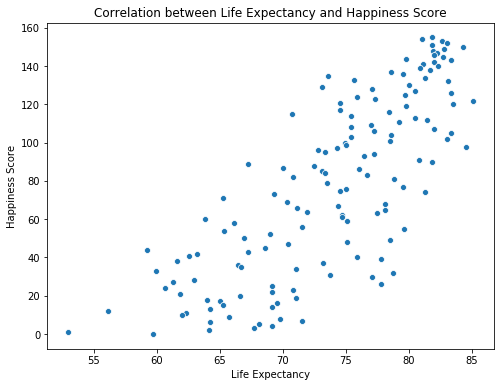

In [12]:
# 6. Is there a correlation between life expectancy and happiness score?
correlation_life_expectancy = df['life_exp'].corr(df['happiness_score'])
print("Correlation between life expectancy and happiness score:", correlation_life_expectancy)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='life_exp', y='happiness_score')
plt.title('Correlation between Life Expectancy and Happiness Score')
plt.xlabel('Life Expectancy')
plt.ylabel('Happiness Score')
plt.show()

In [13]:
# 7. How does corruption level vary across different countries?
average_corruption = df['corruption'].mean()
print("Average corruption level:", average_corruption)

country_least_corrupt = df.loc[df['corruption'].idxmin(), 'country']
country_most_corrupt = df.loc[df['corruption'].idxmax(), 'country']

print("Country with the least corruption:", country_least_corrupt)
print("Country with the most corruption:", country_most_corrupt)

Average corruption level: 73.24444444444444
Country with the least corruption: Singapore
Country with the most corruption: Moldova


In [14]:
# 8. Which country has the highest and lowest generosity?
country_most_generous = df.loc[df['generosity'].idxmax(), 'country']
country_least_generous = df.loc[df['generosity'].idxmin(), 'country']
print("Country with the highest generosity:", country_most_generous)
print("Country with the lowest generosity:", country_least_generous)

Country with the highest generosity: Yemen
Country with the lowest generosity: Myanmar


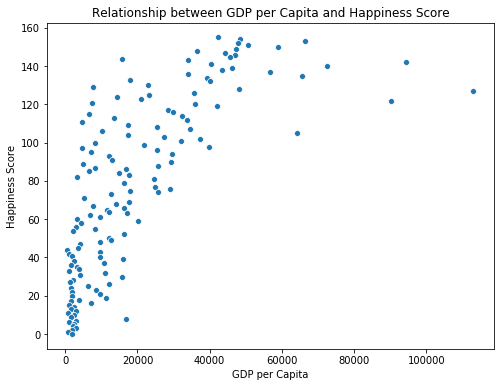

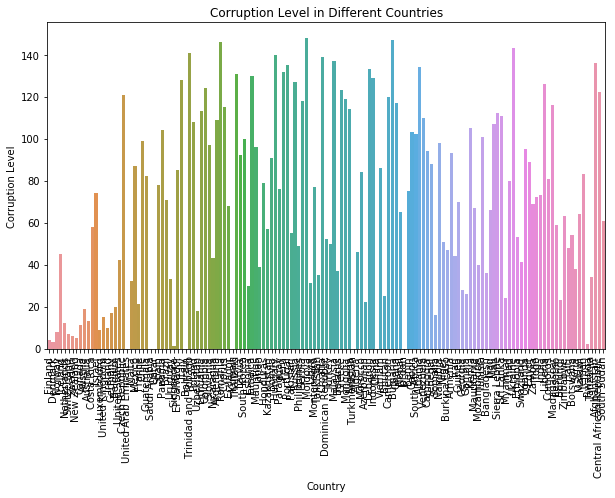

In [15]:
# 9. Are there any noticeable patterns or trends in the data?
# We can observe trends or patterns by analyzing the data, visualizations, and further exploration.

# Additional Data Visualization
# Scatter plot of GDP per capita and Happiness Score
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='gdp_per_cap', y='happiness_score')
plt.title('Relationship between GDP per Capita and Happiness Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()

# Bar plot of Corruption level
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='country', y='corruption')
plt.title('Corruption Level in Different Countries')
plt.xlabel('Country')
plt.ylabel('Corruption Level')
plt.xticks(rotation=90)
plt.show()